In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx
/kaggle/input/flight-fare-prediction-mh/Sample_submission.xlsx
/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx


In [2]:
! pip install openpyxl

     |████████████████████████████████| 243 kB 1.1 MB/s eta 0:00:01


In [212]:
data=pd.read_excel("/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx")

In [213]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [214]:
mn=data["Price"].mean()


In [215]:
sd=data["Price"].std()

In [216]:
data=data[(data["Price"]>mn-3*sd) & (data["Price"]<mn+3*sd)]

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10587 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10587 non-null  object
 1   Date_of_Journey  10587 non-null  object
 2   Source           10587 non-null  object
 3   Destination      10587 non-null  object
 4   Route            10586 non-null  object
 5   Dep_Time         10587 non-null  object
 6   Arrival_Time     10587 non-null  object
 7   Duration         10587 non-null  object
 8   Total_Stops      10586 non-null  object
 9   Additional_Info  10587 non-null  object
 10  Price            10587 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 992.5+ KB


In [219]:
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"])

In [220]:
data["Weekdays"]=pd.DataFrame(data["Date_of_Journey"].dt.weekday)
data["day"]=pd.DataFrame(data["Date_of_Journey"].dt.day)

In [221]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekdays,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,3


In [222]:
data["Route"].value_counts()

DEL → BOM → COK                      2368
BLR → DEL                            1550
CCU → BOM → BLR                       979
CCU → BLR                             723
BOM → HYD                             621
                                     ... 
CCU → VTZ → BLR                         1
CCU → RPR → HYD → BLR                   1
BOM → NDC → HYD                         1
CCU → IXZ → MAA → BLR                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
Name: Route, Length: 125, dtype: int64

In [223]:
def fun(X):
    a=0
    data=X.split(" ")
    for i in data:
        if i[-1]=="h":
            a +=int(i[:-1])*60
        elif i[-1]=="m":
            a+=int(i[:-1])
            
    return a
    

In [224]:
data["Duration(min)"]=data["Duration"].apply(fun)

In [225]:
data["Month"]=pd.DataFrame(pd.to_datetime(data["Date_of_Journey"]).dt.month)

In [226]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekdays,day,Duration(min),Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,24,170,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,445,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,6,1140,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3,5,325,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,285,1


In [227]:
data["Total_Stops"].value_counts()

1 stop      5550
non-stop    3488
2 stops     1502
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [228]:
def stops(X):
    data=X.split(" ")
    if data[0]=="non-stop":
        return 0
    else:
        return int(data[0])

In [229]:
data.dropna(inplace=True)

In [230]:
data["Total_Stops"].dtype

dtype('O')

In [231]:
data["Stops"]=pd.DataFrame(data["Total_Stops"].apply(stops))

In [232]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekdays,day,Duration(min),Month,Stops
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,24,170,3,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,445,1,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,6,1140,9,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3,5,325,12,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,285,1,1


In [233]:
data.drop(columns=["Route","Duration","Total_Stops"],inplace=True)

In [234]:
data["Additional_Info"].value_counts()

No info                         8265
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                     9
Change airports                    6
No Info                            3
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [235]:
data.drop(columns=["Additional_Info"],inplace=True)

In [236]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Price,Weekdays,day,Duration(min),Month,Stops
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,3897,6,24,170,3,0
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7662,5,5,445,1,2
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,13882,4,6,1140,9,2
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,6218,3,5,325,12,1
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,13302,3,3,285,1,1


In [237]:
data["Arrival_hours"]=pd.DataFrame(pd.to_datetime(data["Arrival_Time"]).dt.hour)
data["Departure_hours"]=pd.DataFrame(pd.to_datetime(data["Dep_Time"]).dt.hour)

In [238]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,3897,6,24,170,3,0,1,22
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7662,5,5,445,1,2,13,5
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,13882,4,6,1140,9,2,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,6218,3,5,325,12,1,23,18
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,13302,3,3,285,1,1,21,16


In [239]:
def time(X):
    if X >0 and X< 7:
        return "Early Morning"
    elif X>7 and X<12:
        return "Morning"
    elif X>12 and X<16:
        return "Afternoon"
    elif X>16 and X<20:
        return "Evening"
    elif X>20 and X<=23:
        return "Night"
        

In [240]:
data["Time_Dep"]=pd.DataFrame(data["Departure_hours"].apply(time))

In [241]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Time_Dep
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,3897,6,24,170,3,0,1,22,Night
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7662,5,5,445,1,2,13,5,Early Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,13882,4,6,1140,9,2,4,9,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,6218,3,5,325,12,1,23,18,Evening
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,13302,3,3,285,1,1,21,16,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,4107,2,4,150,9,0,22,19,Evening
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,4145,5,27,155,4,0,23,20,None
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,7229,5,27,180,4,0,11,8,Morning
10681,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,12648,3,3,160,1,0,14,11,Morning


In [242]:
data["Time_arr"]=pd.DataFrame(data["Arrival_hours"].apply(time))

In [243]:
data["Date_of_Journey"]

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10586, dtype: datetime64[ns]

In [244]:
data["Airline"].value_counts()

Jet Airways                          3785
IndiGo                               2053
Air India                            1736
Multiple carriers                    1186
SpiceJet                              817
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

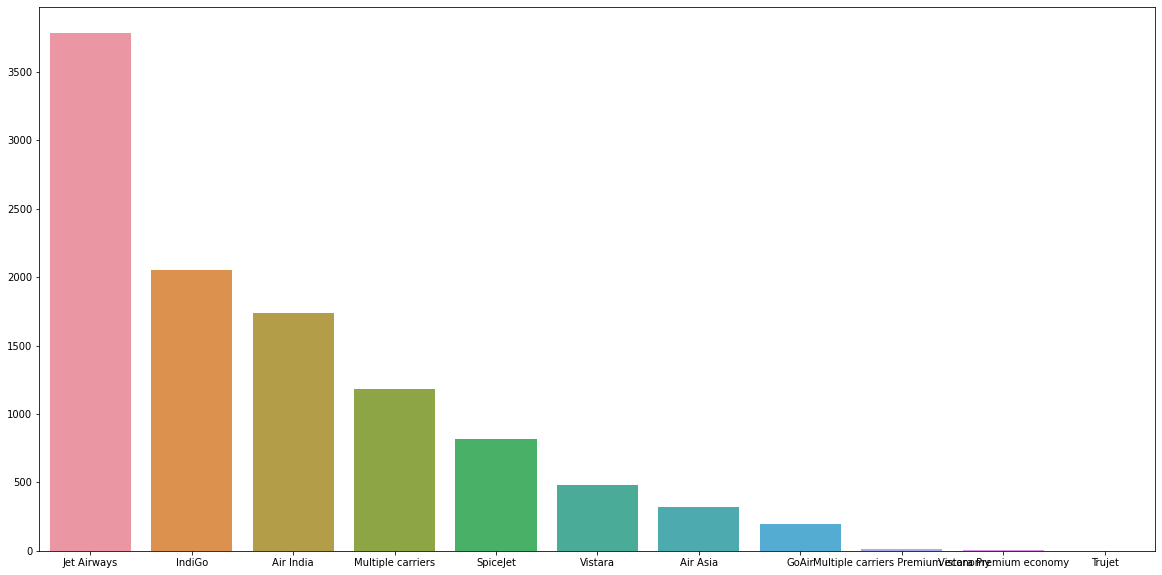

In [246]:
plt.figure(figsize=(20,10))
sns.barplot(data["Airline"].value_counts().index,data["Airline"].value_counts().values)

JET airways is not available today.

In [247]:
Airlines=pd.get_dummies(data["Airline"],drop_first=True)

In [248]:
data["Source"].value_counts()

Delhi       4520
Kolkata     2870
Banglore    2124
Mumbai       691
Chennai      381
Name: Source, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

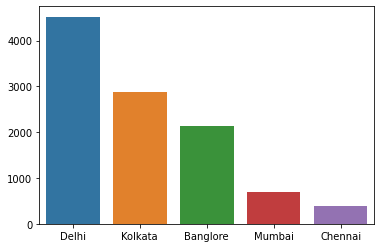

In [249]:
sns.barplot(data["Source"].value_counts().index,data["Source"].value_counts().values)

In [250]:
source=pd.get_dummies(data["Source"],drop_first=True)

In [251]:
data["Destination"].value_counts()

Cochin       4520
Banglore     2870
Delhi        1265
New Delhi     859
Hyderabad     691
Kolkata       381
Name: Destination, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

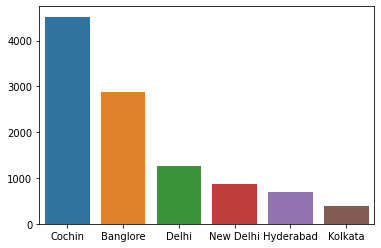

In [252]:
sns.barplot(data["Destination"].value_counts().index,data["Destination"].value_counts().values)

In [253]:
Destination=pd.get_dummies(data["Destination"],drop_first=True)

In [254]:
Destination.rename(columns={"Cochin":"DES_Cochin","Delhi":"DES_Delhi","Hyderabad":"DES_Hyderabad","Kolkata":"DES_Kolkata","New Delhi":"DES_New Delhi"},inplace=True)

In [255]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Time_Dep,Time_arr
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,3897,6,24,170,3,0,1,22,Night,Early Morning
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7662,5,5,445,1,2,13,5,Early Morning,Afternoon
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,13882,4,6,1140,9,2,4,9,Morning,Early Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,6218,3,5,325,12,1,23,18,Evening,Night
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,13302,3,3,285,1,1,21,16,None,Night


In [256]:
data["Depature_min"]=pd.DataFrame(pd.to_datetime(data["Dep_Time"]).dt.minute)

In [257]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Time_Dep,Time_arr,Depature_min
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,3897,6,24,170,3,0,1,22,Night,Early Morning,20
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7662,5,5,445,1,2,13,5,Early Morning,Afternoon,50
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,13882,4,6,1140,9,2,4,9,Morning,Early Morning,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,6218,3,5,325,12,1,23,18,Evening,Night,5
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,13302,3,3,285,1,1,21,16,None,Night,50


In [258]:

data["Arrival_min"]=pd.DataFrame(pd.to_datetime(data["Arrival_Time"]).dt.minute)

In [259]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Time_Dep,Time_arr,Depature_min,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,3897,6,24,170,3,0,1,22,Night,Early Morning,20,10
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7662,5,5,445,1,2,13,5,Early Morning,Afternoon,50,15
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,13882,4,6,1140,9,2,4,9,Morning,Early Morning,25,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,6218,3,5,325,12,1,23,18,Evening,Night,5,30
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,13302,3,3,285,1,1,21,16,None,Night,50,35


In [260]:
data.drop(columns=["Dep_Time","Arrival_Time"],inplace=True)

In [261]:
data

,Airline,Date_of_Journey,Source,Destination,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Time_Dep,Time_arr,Depature_min,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,3897,6,24,170,3,0,1,22,Night,Early Morning,20,10
1,Air India,2019-01-05,Kolkata,Banglore,7662,5,5,445,1,2,13,5,Early Morning,Afternoon,50,15
2,Jet Airways,2019-09-06,Delhi,Cochin,13882,4,6,1140,9,2,4,9,Morning,Early Morning,25,25
3,IndiGo,2019-12-05,Kolkata,Banglore,6218,3,5,325,12,1,23,18,Evening,Night,5,30
4,IndiGo,2019-01-03,Banglore,New Delhi,13302,3,3,285,1,1,21,16,None,Night,50,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,4107,2,4,150,9,0,22,19,Evening,Night,55,25
10679,Air India,2019-04-27,Kolkata,Banglore,4145,5,27,155,4,0,23,20,None,Night,45,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,7229,5,27,180,4,0,11,8,Morning,Morning,20,20
10681,Vistara,2019-01-03,Banglore,New Delhi,12648,3,3,160,1,0,14,11,Morning,Afternoon,30,10


In [262]:
Time_Dep=pd.get_dummies(data["Time_Dep"],drop_first=True)

In [263]:
Time_Dep

,Early Morning,Evening,Morning,Night
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
10678,0,1,0,0
10679,0,0,0,0
10680,0,0,1,0
10681,0,0,1,0


In [264]:
Time_arr=pd.get_dummies(data["Time_arr"],drop_first=True)

In [265]:
Time_arr.rename(columns={"Evening":"Arr_Evening","Morning":"Arr_Morning","Night":"Arr_Night"},inplace=True)

In [266]:
data.drop(columns=["Destination","Date_of_Journey","Airline"],inplace=True)

In [267]:
data.head()

,Source,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Time_Dep,Time_arr,Depature_min,Arrival_min
0,Banglore,3897,6,24,170,3,0,1,22,Night,Early Morning,20,10
1,Kolkata,7662,5,5,445,1,2,13,5,Early Morning,Afternoon,50,15
2,Delhi,13882,4,6,1140,9,2,4,9,Morning,Early Morning,25,25
3,Kolkata,6218,3,5,325,12,1,23,18,Evening,Night,5,30
4,Banglore,13302,3,3,285,1,1,21,16,None,Night,50,35


In [268]:
data[Airlines.columns]=Airlines
data[source.columns]=source
data[Destination.columns]=Destination
data[Time_Dep.columns]=Time_Dep
data[Time_arr.columns]=Time_arr


In [269]:
# data[Time_Dep.columns]=Time_Dep

In [270]:
pd.set_option("display.max_columns",50)
data.head()

,Source,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Time_Dep,Time_arr,Depature_min,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,DES_Cochin,DES_Delhi,DES_Hyderabad,DES_Kolkata,DES_New Delhi,Early Morning,Evening,Morning,Night,Arr_Evening,Arr_Morning,Arr_Night
0,Banglore,3897,6,24,170,3,0,1,22,Night,Early Morning,20,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,Kolkata,7662,5,5,445,1,2,13,5,Early Morning,Afternoon,50,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Delhi,13882,4,6,1140,9,2,4,9,Morning,Early Morning,25,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,Kolkata,6218,3,5,325,12,1,23,18,Evening,Night,5,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,Banglore,13302,3,3,285,1,1,21,16,None,Night,50,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [271]:
# data.drop(columns=["Source"],inplace=True)

In [272]:
data.drop(columns=["Time_Dep","Time_arr"],inplace=True)

In [273]:
# data.drop(columns=["Arrival_hours","Departure_hours","Depature_min","Arrival_min"],inplace=True)

In [274]:
data.head()

,Source,Price,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Depature_min,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,DES_Cochin,DES_Delhi,DES_Hyderabad,DES_Kolkata,DES_New Delhi,Early Morning,Evening,Morning,Night,Arr_Evening,Arr_Morning,Arr_Night
0,Banglore,3897,6,24,170,3,0,1,22,20,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,Kolkata,7662,5,5,445,1,2,13,5,50,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Delhi,13882,4,6,1140,9,2,4,9,25,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,Kolkata,6218,3,5,325,12,1,23,18,5,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,Banglore,13302,3,3,285,1,1,21,16,50,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [275]:
data.drop(columns=["Source"],inplace=True)

In [276]:
# data.drop(columns=["Arr_Evening","Arr_Morning","Arr_Night"],inplace=True)

In [277]:
X=data.iloc[:,1:]

In [278]:
X.head()

,Weekdays,day,Duration(min),Month,Stops,Arrival_hours,Departure_hours,Depature_min,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,DES_Cochin,DES_Delhi,DES_Hyderabad,DES_Kolkata,DES_New Delhi,Early Morning,Evening,Morning,Night,Arr_Evening,Arr_Morning,Arr_Night
0,6,24,170,3,0,1,22,20,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,5,5,445,1,2,13,5,50,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,6,1140,9,2,4,9,25,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,3,5,325,12,1,23,18,5,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,3,3,285,1,1,21,16,50,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [279]:
Y=data.iloc[:,0]

In [280]:
from sklearn.preprocessing import StandardScaler

In [281]:
X_s=StandardScaler()

In [282]:
XS=X_s.fit_transform(X)

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
xtrain,xtest,ytrain,ytest=train_test_split(XS,Y,test_size=0.2,random_state=40)

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [286]:
models={"LinearRegression":LinearRegression(),
        "Ridge":Ridge(),
        "Lasso":Lasso(),
       "SVR":SVR()}

In [287]:
from sklearn.metrics import r2_score

In [288]:
for model in models.values():
    model.fit(xtrain,ytrain)
    yp=model.predict(xtest)
    print(r2_score(ytest,yp))

0.642130697490958
0.6421263500573686
0.642173280476598
0.06825999191325205


In [289]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=43)

In [290]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [293]:
treemodels={"DecisionTreeRegressor":DecisionTreeRegressor(),
           "RandomForestRegressor":RandomForestRegressor(random_state=40)}

In [294]:
for model in treemodels.values():
    model.fit(Xtrain,Ytrain)
    yp=model.predict(Xtest)
    
    print(r2_score(Ytest,yp))

0.7072291627116344
0.812317891033119


In [295]:
# plt.figure(figsize=(30,30))
# sns.heatmap(X.corr(),annot=True)

In [296]:
from sklearn.model_selection import RandomizedSearchCV

In [297]:
RandomForestRegressor()

RandomForestRegressor()

In [345]:
params={
    "n_estimators":[150,200,250,300,450,500],
    "max_depth":[30,50,100,150,200,250],
    "min_samples_split":[2,4,8],
    "min_samples_split":[5,10,15]
    
}

In [346]:
model=RandomizedSearchCV(estimator=RandomForestRegressor(random_state=40),param_distributions=params,cv=3,n_iter=30,n_jobs=-1,verbose=1)

In [347]:
np.ravel(Ytrain)

array([ 7575, 10262, 15197, ...,  6427, 14300, 12829])

In [348]:
model.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=40),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [30, 50, 100, 150, 200,
                                                      250],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [150, 200, 250, 300,
                                                         450, 500]},
                   verbose=1)

In [349]:
model.best_score_

0.8334994817270509

model.best_params_

In [350]:
model.best_params_

{'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 150}

In [193]:
# from sklearn.ensemble import ExtraTreesRegressor

In [358]:
from sklearn.model_selection import GridSearchCV

In [359]:
params={'n_estimators':[490,500,510,520],
        "min_samples_split":[9,10,11],
        "max_depth":[120,130,150,160,170]
    
}

In [360]:
mod=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,n_jobs=-1,cv=3,verbose=2)

In [361]:
mod.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 11.8min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [120, 130, 150, 160, 170],
                         'min_samples_split': [9, 10, 11],
                         'n_estimators': [490, 500, 510, 520]},
             verbose=2)

In [362]:
mod.best_score_

0.8339635224704981

In [363]:
mod.best_estimator_

RandomForestRegressor(max_depth=170, min_samples_split=11, n_estimators=520)

In [364]:
model= RandomForestRegressor(n_estimators=520,min_samples_split=11,max_depth=170)

In [365]:
model.fit(Xtrain, Ytrain)

RandomForestRegressor(max_depth=170, min_samples_split=11, n_estimators=520)

In [369]:
model.score(Xtest,Ytest)

0.8409218616188794

In [370]:
# model.score(Xtrain,Ytrain)